# Max Voting

Max voting, or majority voting, is an ensemble learning method used for classification problems where the final prediction is the class that receives the most "votes" from a group of individual models. Each model in the ensemble makes its own prediction, and the class with the highest number of votes wins. This is a simple yet effective way to improve a model's accuracy and robustness.

#  Averaging

1. What is combined?:  averaging typically refers to a model ensemble technique that combines the predictions of multiple, separate models.

2. Computational cost:  The predictions of multiple, separately trained models are combined to make a final prediction. This can be simple averaging or weighted averaging

3. Model storage:  High During inference, you must run every individual model and then combine their predictions, which is computationally expensive and slow.

4. Mechanism:  An ensemble of diverse models, each with its own "opinion," is used. The idea is that the uncorrelated errors of the individual models will cancel each other out, leading to a more robust final prediction.

5. Application:  Widely used for both traditional machine learning models (e.g., Random Forests) and deep learning models to improve prediction accuracy and generalization.

6. Flexibility:  Can use different architectures for each model, allowing for a diverse ensemble.

# Average weights

1. What is combined?:   The weights or parameters of multiple models are combined into a single, new model.

2. Computational cost:  Low. The final averaged-weight model can be used for inference just like a normal single model, with no additional computational cost.

3. Model storage:  Low. You only need to store the single, new model with the averaged weights.

4. Mechanism:  A new model is created with parameters that represent a compromise or "smoother" version of the parameter space. For deep learning, this can help the final model land in a wider, more stable minimum of the loss landscape.

5. Application:   Primarily used for deep neural networks, where averaging weight parameters has shown to improve a model's generalization capabilities.

6. Flexibility:  All models being averaged must have the same architecture to combine their weights.

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_moons

In [21]:
x,y = make_moons(n_samples=1000, noise=0.2)

In [22]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [23]:
dataset = pd.DataFrame(df)

In [24]:
dataset.head(3)

,x1,x2,y
0,-0.878597,0.528255,0
1,-0.770131,0.222114,0
2,0.701434,0.345475,0


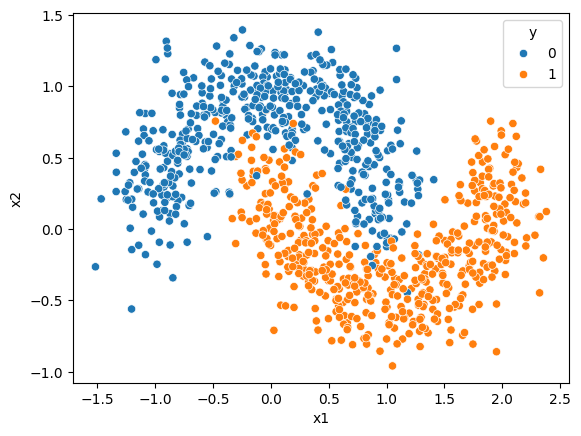

In [25]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [27]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [32]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(100.0, 96.5)

In [33]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(96.375, 96.5)

In [34]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100, gnb.score(x_test,y_test)*100

(88.375, 84.5)

In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [39]:
vc = VotingClassifier(li,weights=[10,4,7])
vc.fit(x_train,y_train)

,estimators,"[('dt1', ...), ('sv1', ...), ...]"
,voting,'hard'
,weights,"[10, 4, ...]"
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [40]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100

(97.375, 95.0)

# How it work

In [41]:
prd = {"dt":dt.predict(x_test),"sv":sv.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [42]:
pd.DataFrame(prd)

,dt,sv,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
195,1,1,1,1
196,1,1,0,1
197,0,0,0,0
198,1,1,1,1
